In [3]:
from google.colab import files
uploaded = files.upload()

Saving house_prices_200.csv to house_prices_200.csv


In [4]:
import pandas as pd
df = pd.read_csv("house_prices_200.csv")
print(df.head())

   Area  Bedrooms  Bathrooms  LocationScore   Price
0  1360         4          2              9  410915
1  1794         4          3              3  429200
2  1630         2          1              9  402303
3  1595         3          4              7  416037
4  2138         1          3              4  396414


In [6]:
X = df[["Area","Bedrooms","Bathrooms","LocationScore"]]
Y = df["Price"]

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
  X,Y,  test_size=0.2, random_state=42
)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
print("Intercept : ",model.intercept_)
print("Coefficients : ",model.coef_)

Intercept :  43713.90323287825
Coefficients :  [  120.42762721 20219.49485028 15368.08532958 10445.37337879]


In [10]:
from sklearn.metrics import r2_score, mean_absolute_error

# Predict test data
Y_pred = model.predict(X_test)

# Compare
print("R² Score:", r2_score(Y_test, Y_pred))
print("MAE:", mean_absolute_error(Y_test, Y_pred))

print("Predicted:", Y_pred[:5])
print("Actual:", Y_test.values[:5])

R² Score: 0.9847844068352624
MAE: 10019.791239288068
Predicted: [587936.91336977 531311.53799165 504118.79679283 354427.54175378
 403598.75076604]
Actual: [575698 516220 520394 369214 410018]


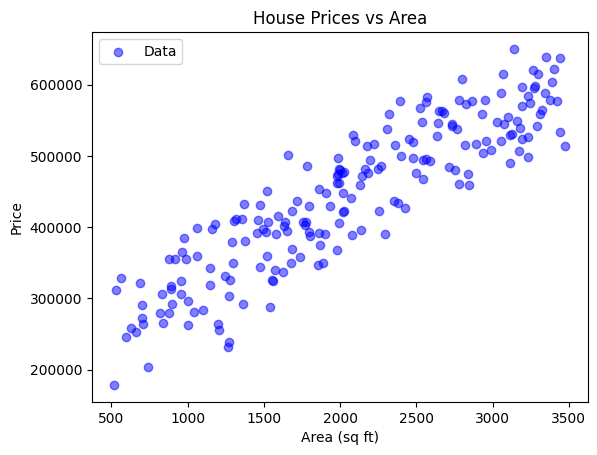

In [11]:
import matplotlib.pyplot as plt

plt.scatter(df["Area"], df["Price"], color="blue", alpha=0.5, label="Data")
plt.xlabel("Area (sq ft)")
plt.ylabel("Price")
plt.title("House Prices vs Area")
plt.legend()
plt.show()

In [12]:
importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

importance['AbsCoef'] = importance['Coefficient'].abs()
importance = importance.sort_values(by="AbsCoef", ascending=False)

print("Feature Importance:")
print(importance[['Feature', 'Coefficient']])

Feature Importance:
         Feature   Coefficient
1       Bedrooms  20219.494850
2      Bathrooms  15368.085330
3  LocationScore  10445.373379
0           Area    120.427627


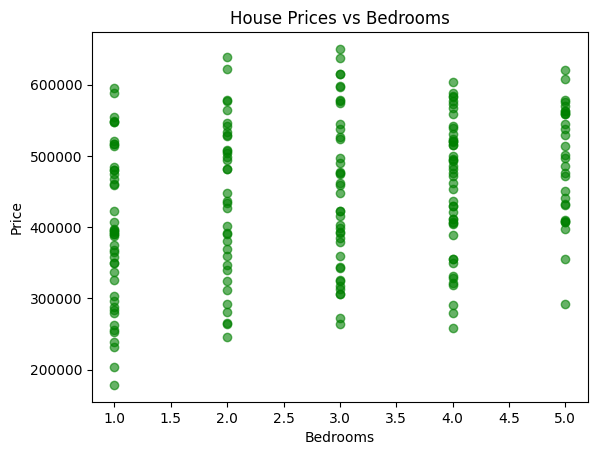

In [13]:
plt.scatter(df['Bedrooms'], df['Price'], color='green', alpha=0.6)
plt.xlabel("Bedrooms")
plt.ylabel("Price")
plt.title("House Prices vs Bedrooms")
plt.show()

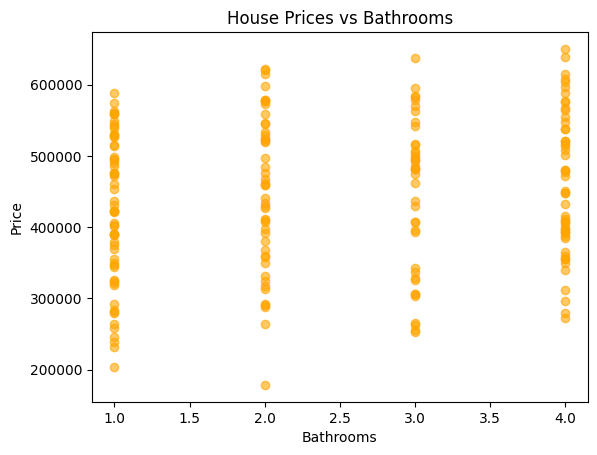

In [14]:
plt.scatter(df['Bathrooms'], df['Price'], color='orange', alpha=0.6)
plt.xlabel("Bathrooms")
plt.ylabel("Price")
plt.title("House Prices vs Bathrooms")
plt.show()

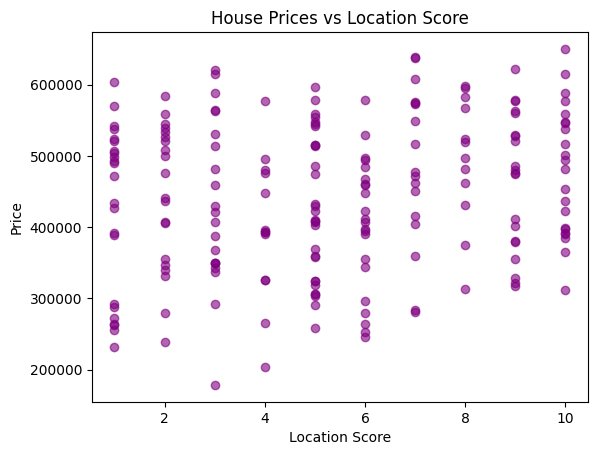

In [15]:
plt.scatter(df['LocationScore'], df['Price'], color='purple', alpha=0.6)
plt.xlabel("Location Score")
plt.ylabel("Price")
plt.title("House Prices vs Location Score")
plt.show()

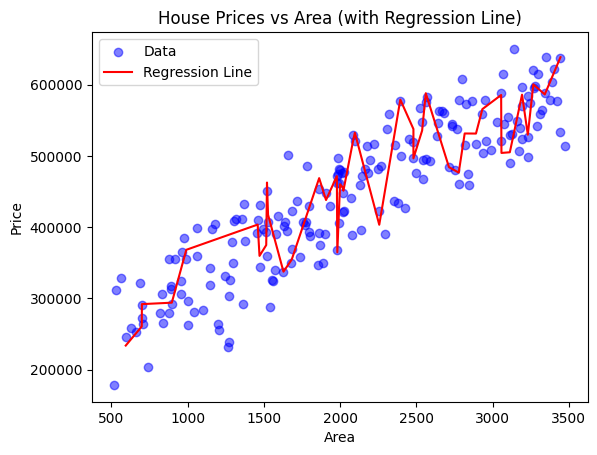

In [17]:
area_sorted = X_test['Area'].sort_values()
pred_sorted = model.predict(X_test.loc[area_sorted.index])

plt.scatter(df['Area'], df['Price'], color='blue', alpha=0.5, label="Data")
plt.plot(area_sorted, pred_sorted, color='red', label="Regression Line")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("House Prices vs Area (with Regression Line)")
plt.legend()
plt.show()